In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

In [3]:
import gc
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from random import shuffle
from scipy.stats import spearmanr

from access_biology_data import lincs, properties
from access_science_shared import standardizer

sys.path.append('./../src/')
from aging_tools import inout, export

from access_biology_data import annotation
from access_biology_data import meta

In [33]:
outfolder = '220216_human_tissue_effects'

In [34]:
save_images = False

In [35]:
ref_genes = standardizer.reference_genes(9606, 'orp')

In [36]:
import glob

In [37]:
p = inout.get_internal_path(
    'figures/tstoeger/material/220127_export_human_tissue_effects/stable_5_gtex_females.xlsx'
)
d1 = pd.read_excel(p)

In [38]:
d1 = d1[d1['comparison']=='20/30 to 60/70']

In [39]:
p = inout.get_internal_path(
    'figures/tstoeger/material/220127_export_human_tissue_effects/stable_6_gtex_males.xlsx'
)
d2 = pd.read_excel(p)

d2 = d2[d2['comparison']=='20/30 to 60/70']




In [40]:
piv = pd.merge(
    d1[['tissue', 'rho']].rename(columns={'rho': 'females'}),
    d2[['tissue', 'rho']].rename(columns={'rho': 'males'})



)

In [41]:
piv['down'] = piv[['females', 'males']].min(1)
piv['up'] = piv[['females', 'males']].max(1)

In [43]:
piv['median'] = piv[['females', 'males']].median(1)

In [44]:
piv['upper_error'] = piv['up'] - piv['median']
piv['down_error'] = piv['median'] - piv['down']

In [45]:
# piv = piv.reset_index()

In [46]:
piv = piv.sort_values('median', ascending=False)

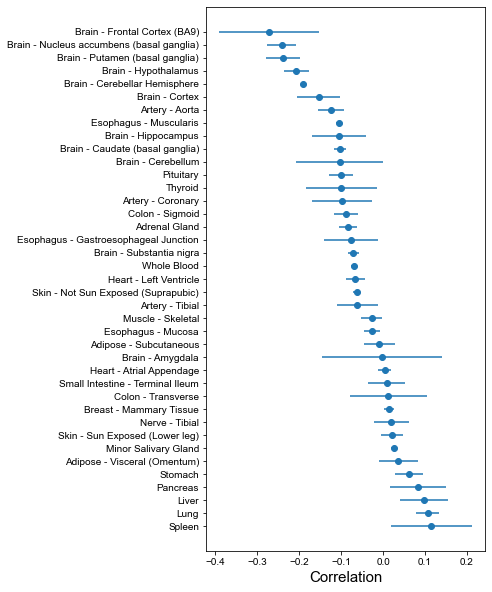

In [49]:
plt.figure(figsize=(5, 10))

plt.errorbar(
    y=piv['tissue'],
    x=piv['median'],
    marker='o',
    linestyle='none',
    xerr=[
        piv['down_error'],
        piv['upper_error']
    ]

)

plt.xlabel('Correlation', fontsize=15)



if save_images:
    export.export_image('{}/rank_by_tissue.pdf'.format(
        outfolder))

In [50]:
piv

,tissue,females,males,down,up,median,upper_error,down_error
35,Spleen,0.213189,0.017831,0.017831,0.213189,0.115510,0.097679,0.097679
26,Lung,0.078207,0.134635,0.078207,0.134635,0.106421,0.028214,0.028214
25,Liver,0.153848,0.041221,0.041221,0.153848,0.097534,0.056313,0.056313
30,Pancreas,0.150494,0.016591,0.016591,0.150494,0.083542,0.066952,0.066952
36,Stomach,0.094240,0.027424,0.027424,0.094240,0.060832,0.033408,0.033408
1,Adipose - Visceral (Omentum),0.083355,-0.010010,-0.010010,0.083355,0.036672,0.046683,0.046683
27,Minor Salivary Gland,0.019296,0.033631,0.019296,0.033631,0.026463,0.007167,0.007167
33,Skin - Sun Exposed (Lower leg),-0.003776,0.046949,-0.003776,0.046949,0.021587,0.025362,0.025362
29,Nerve - Tibial,-0.021557,0.061135,-0.021557,0.061135,0.019789,0.041346,0.041346
17,Breast - Mammary Tissue,0.001400,0.026923,0.001400,0.026923,0.014161,0.012761,0.012761
